In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_excel("data/강서구일대 사기피해현황.xlsx",index_col=1)
df.drop('지 역', axis=1, inplace=True)
df

,지역코드,2017건수,2017금액,2018건수,2018금액,2019건수,2019금액,2020건수,2020금액,2021건수,2021금액,건수 합계,금액 합계,Unnamed: 15
SIG_KOR_NM,,,,,,,,,,,,,,
부천시,41190,1.0,155000000.0,9,2018300000,22,3950000000,91,18296700000,321,70363650000,444,94783650000,NaN
강서구,11500,NaN,NaN,10,1917000000,154,30847500000,402,82064250000,549,125023000000,1115,239851750000,NaN
양천구,11470,NaN,NaN,4,859000000,46,9092000000,116,23254250000,170,38493000000,336,71698250000,NaN


In [4]:
ndf = df[['2019건수','2020건수','2021건수']]
ndf.fillna(0, inplace=True)



C:\Users\User\anaconda3\envs\pydatavenv\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
ndf = ndf.T

ndf

,2019건수,2020건수,2021건수
SIG_KOR_NM,,,
부천시,22,91,321
강서구,154,402,549
양천구,46,116,170


C:\Users\User\AppData\Local\Temp\ipykernel_29156\2909940316.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2019,2020,2021], fontsize=13)


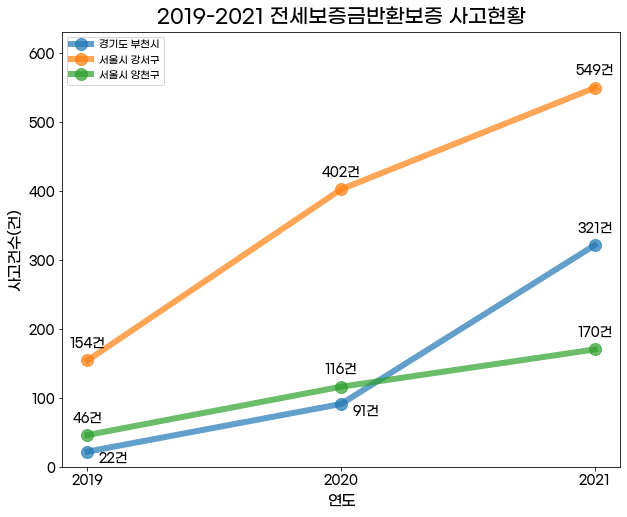

In [23]:
# colors = sns.color_palette('BuGn',len(ndf.columns))

fig = plt.figure(figsize=(10,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

line1 = ax.plot(ndf.columns, ndf.loc['부천시'], label='경기도 부천시', linewidth=6, alpha=0.7, marker='o', markersize=12)
line1 = line1[0]

line2 = ax.plot(ndf.columns, ndf.loc['강서구'], label='서울시 강서구', linewidth=6, alpha=0.7, marker='o', markersize=12)
line2 = line2[0]

line3 = ax.plot(ndf.columns, ndf.loc['양천구'], label='서울시 양천구', linewidth=6, alpha=0.7, marker='o', markersize=12)
line3 = line3[0]

xylist1 = list(line1.get_xydata())
for coord in xylist1[0:2]:
    ax.text(coord[0]+0.1,coord[1]-15,f'{round(coord[1])}건',fontsize=13, ha='center')
for coord in xylist1[2:3]:
    ax.text(coord[0],coord[1]+20,f'{round(coord[1])}건',fontsize=13, ha='center')

xylist2 = list(line2.get_xydata())
for coord in xylist2[0:3]:
    ax.text(coord[0],coord[1]+20,f'{round(coord[1])}건',fontsize=13, ha='center')
    
xylist3 = list(line3.get_xydata())
for coord in xylist3[0:3]:
    ax.text(coord[0],coord[1]+20,f'{round(coord[1])}건',fontsize=13, ha='center')

ax.set_title('2019-2021 전세보증금반환보증 사고현황',size=20, pad=10)


ax.set_xticklabels([2019,2020,2021], fontsize=13)
plt.yticks(fontsize=13)
ax.set_ylim(0,630)
ax.set_xlabel('연도', fontsize = 15)
ax.set_ylabel('사고건수(건)', fontsize = 15)
               
ax.legend(loc='upper left')

plt.savefig('output/강서구_일대_전세보증금반환보증_사고현황2.png')